## Homework 3: Imbalanced Datasets

### Instructions:
Please upload the *.ipynb* AND *.pdf* to Gradescope prior to the deadline (10/31). Submission on Courseworks/Canvas is **not** required, and won't be accepted.

Please name your soltution file in the following format - AML_HW3_Solutions_(YOUR_UNI)


### GIST:
The goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target column of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name:  Zhengqi Zhu

## UNI: zz3066

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other packages you need for your solution

In [33]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report,ConfusionMatrixDisplay,precision_recall_fscore_support,auc
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1. Examining Class Imbalance.**

a. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale. </br>
b. What is the degree of imbalance? (Mild/Moderate/Extreme)

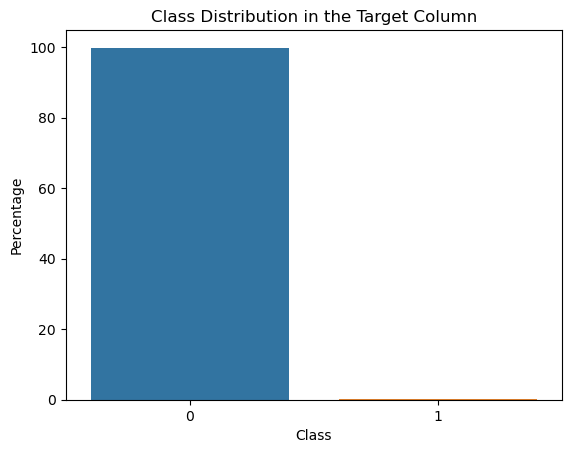

In [5]:
#Your code here
class_distribution = df['Class'].value_counts(normalize=True) * 100
total_count = len(df)
minority_class_count = df['Class'].value_counts().min()
majority_class_count = df['Class'].value_counts().max()
imbalance_ratio = majority_class_count / minority_class_count

if imbalance_ratio < 1.5:
    degree_of_imbalance = "Mild"
elif imbalance_ratio < 3:
    degree_of_imbalance = "Moderate"
else:
    degree_of_imbalance = "Extreme"
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Distribution in the Target Column')
plt.show()

In [6]:
#Your code here
print("Class Distribution:\n", class_distribution)
print("\nDegree of Imbalance:", degree_of_imbalance)

Class Distribution:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Degree of Imbalance: Extreme


### **2. Pre-processing**

The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [8]:
# You don't want the 'Time' column. Pop it off
df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

a. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
b. Scale numerical columns. </br>
c. Print the shape of the development and test set.

In [9]:
#Your code here
X = df.drop('Class', axis=1)
y = df['Class']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

I chose an 80-20 split with stratification. This ensures that both the development and test sets have the same class distribution as the original dataset, which is important given the extreme imbalance in the classes. It allows for better generalization and evaluation of the model's performance on the minority class.

In [10]:
#Your code here
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_test_scaled = scaler.transform(X_test)

In [11]:
#Your code here
print("Development Set Shape:", X_dev_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)

Development Set Shape: (227845, 29)
Test Set Shape: (56962, 29)


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [12]:
#Your Code Here
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

y_pred_proba = cross_val_predict(clf, X_dev_scaled, y_dev, cv=5, method='predict_proba')

auc = roc_auc_score(y_dev, y_pred_proba[:, 1])
avg_precision = average_precision_score(y_dev, y_pred_proba[:, 1])

print("AUC (5-Fold Cross Validation):", auc)
print("Average Precision (5-Fold Cross Validation):", avg_precision)

AUC (5-Fold Cross Validation): 0.8351448184957424
Average Precision (5-Fold Cross Validation): 0.6433015603896175


### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [13]:
#Your Code Here
clf_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')

y_pred_proba_balanced = cross_val_predict(clf_balanced, X_dev_scaled, y_dev, cv=5, method='predict_proba')

auc_balanced = roc_auc_score(y_dev, y_pred_proba_balanced[:, 1])
avg_precision_balanced = average_precision_score(y_dev, y_pred_proba_balanced[:, 1])

print("AUC (Balanced - 5-Fold Cross Validation):", auc_balanced)
print("Average Precision (Balanced - 5-Fold Cross Validation):", avg_precision_balanced)

AUC (Balanced - 5-Fold Cross Validation): 0.9056858835462458
Average Precision (Balanced - 5-Fold Cross Validation): 0.4969436478603512


### 3.3 Random Oversampling

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [14]:
#Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_oversampled, y_dev_oversampled = ros.fit_resample(X_dev_scaled, y_dev)

class_distribution_oversampled = pd.Series(y_dev_oversampled).value_counts(normalize=True) * 100

print("Class Distribution After Oversampling:\n", class_distribution_oversampled)
print("Oversampled Development Set Shape:", X_dev_oversampled.shape)

Class Distribution After Oversampling:
 Class
0    50.0
1    50.0
Name: proportion, dtype: float64
Oversampled Development Set Shape: (454902, 29)


In [15]:
#Your Code Here
clf_oversampled = DecisionTreeClassifier(max_depth=10, random_state=42)

y_pred_proba_oversampled = cross_val_predict(clf_oversampled, X_dev_oversampled, y_dev_oversampled, cv=5, method='predict_proba')

auc_oversampled = roc_auc_score(y_dev_oversampled, y_pred_proba_oversampled[:, 1])
avg_precision_oversampled = average_precision_score(y_dev_oversampled, y_pred_proba_oversampled[:, 1])

print("AUC (Oversampled - 5-Fold Cross Validation):", auc_oversampled)
print("Average Precision (Oversampled - 5-Fold Cross Validation):", avg_precision_oversampled)

AUC (Oversampled - 5-Fold Cross Validation): 0.9991598686494616
Average Precision (Oversampled - 5-Fold Cross Validation): 0.9985150472536342


### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [16]:
#Your Code Here
rus = RandomUnderSampler(random_state=42)
X_dev_undersampled, y_dev_undersampled = rus.fit_resample(X_dev_scaled, y_dev)

class_distribution_undersampled = pd.Series(y_dev_undersampled).value_counts(normalize=True) * 100

print("Class Distribution After Undersampling:\n", class_distribution_undersampled)
print("Undersampled Development Set Shape:", X_dev_undersampled.shape)

Class Distribution After Undersampling:
 Class
0    50.0
1    50.0
Name: proportion, dtype: float64
Undersampled Development Set Shape: (788, 29)


In [17]:
#Your Code Here
clf_undersampled = DecisionTreeClassifier(max_depth=10, random_state=42)

y_pred_proba_undersampled = cross_val_predict(clf_undersampled, X_dev_undersampled, y_dev_undersampled, cv=5, method='predict_proba')

auc_undersampled = roc_auc_score(y_dev_undersampled, y_pred_proba_undersampled[:, 1])
avg_precision_undersampled = average_precision_score(y_dev_undersampled, y_pred_proba_undersampled[:, 1])

print("AUC (Undersampled - 5-Fold Cross Validation):", auc_undersampled)
print("Average Precision (Undersampled - 5-Fold Cross Validation):", avg_precision_undersampled)

AUC (Undersampled - 5-Fold Cross Validation): 0.9295653070164136
Average Precision (Undersampled - 5-Fold Cross Validation): 0.9039468603839822


### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [18]:
#Your Code Here
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev_scaled, y_dev)

class_distribution_smote = pd.Series(y_dev_smote).value_counts(normalize=True) * 100

print("Class Distribution After SMOTE:\n", class_distribution_smote)
print("SMOTE Development Set Shape:", X_dev_smote.shape)

Class Distribution After SMOTE:
 Class
0    50.0
1    50.0
Name: proportion, dtype: float64
SMOTE Development Set Shape: (454902, 29)


In [19]:
#Your Code Here
clf_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

y_pred_proba_smote = cross_val_predict(clf_smote, X_dev_smote, y_dev_smote, cv=5, method='predict_proba')

auc_smote = roc_auc_score(y_dev_smote, y_pred_proba_smote[:, 1])
avg_precision_smote = average_precision_score(y_dev_smote, y_pred_proba_smote[:, 1])

print("AUC (SMOTE - 5-Fold Cross Validation):", auc_smote)
print("Average Precision (SMOTE - 5-Fold Cross Validation):", avg_precision_smote)

AUC (SMOTE - 5-Fold Cross Validation): 0.9974939291808848
Average Precision (SMOTE - 5-Fold Cross Validation): 0.9961823830088488


### 3.6 Visual Comparison

Prepare a plot comparing the class distribtion of the target column for each of the imbalance techiques used above. Use the default class split as well.

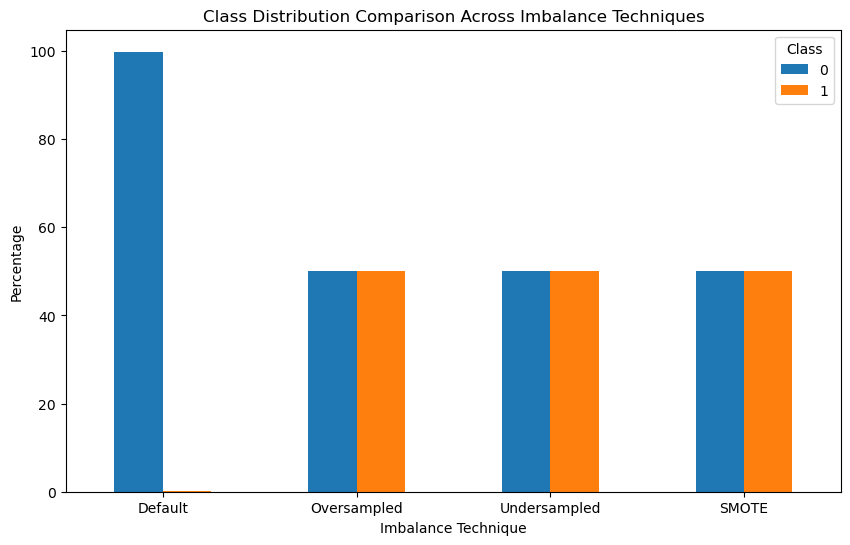

In [20]:
#Your Code Here
ros = RandomOverSampler(random_state=42)
_, y_dev_oversampled = ros.fit_resample(X_dev_scaled, y_dev)

rus = RandomUnderSampler(random_state=42)
_, y_dev_undersampled = rus.fit_resample(X_dev_scaled, y_dev)

smote = SMOTE(random_state=42)
_, y_dev_smote = smote.fit_resample(X_dev_scaled, y_dev)

class_distributions = pd.DataFrame({
    'Default': y_dev.value_counts(normalize=True) * 100,
    'Oversampled': pd.Series(y_dev_oversampled).value_counts(normalize=True) * 100,
    'Undersampled': pd.Series(y_dev_undersampled).value_counts(normalize=True) * 100,
    'SMOTE': pd.Series(y_dev_smote).value_counts(normalize=True) * 100
}).transpose()

class_distributions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Imbalance Technique')
plt.ylabel('Percentage')
plt.title('Class Distribution Comparison Across Imbalance Techniques')
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=0)
plt.show()

### **4.1: Model Prediction & Evaluation - AUC Scores**
Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [21]:
#Your Code Here
clf_default = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_oversampled = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_undersampled = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_smote = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')

clf_default.fit(X_dev_scaled, y_dev)
clf_oversampled.fit(X_dev_oversampled, y_dev_oversampled)
clf_undersampled.fit(X_dev_undersampled, y_dev_undersampled)
clf_smote.fit(X_dev_smote, y_dev_smote)
clf_balanced.fit(X_dev_scaled, y_dev)

y_pred_proba_default = clf_default.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_oversampled = clf_oversampled.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_undersampled = clf_undersampled.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_smote = clf_smote.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_balanced = clf_balanced.predict_proba(X_test_scaled)[:, 1]

auc_default = roc_auc_score(y_test, y_pred_proba_default)
auc_oversampled = roc_auc_score(y_test, y_pred_proba_oversampled)
auc_undersampled = roc_auc_score(y_test, y_pred_proba_undersampled)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

print("AUC - Default Baseline:", auc_default)
print("AUC - Random Oversampling:", auc_oversampled)
print("AUC - Random Undersampling:", auc_undersampled)
print("AUC - SMOTE:", auc_smote)
print("AUC - Balanced Weight:", auc_balanced)

AUC - Default Baseline: 0.8196316775866227
AUC - Random Oversampling: 0.9016732009348478
AUC - Random Undersampling: 0.8959979162599198
AUC - SMOTE: 0.8752678248423735
AUC - Balanced Weight: 0.9017402244381152


If models with high AUC on the development set also have high AUC on the test set, they generalize well, meaning they can handle new data effectively.

However, if the AUC drops significantly on the test set, it suggests overfitting—the model learned the training data too closely and struggles with new data. Consistent AUC across both sets is a sign of a reliable model.

### **4.2: Model Prediction & Evaluation - Confusion Matrix**
a. Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
b. For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

In [29]:
#Your Code Here
def plot_confusion_matrix_and_metrics(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    print(f"{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


In [30]:
#Your Code Here
y_pred_default = (y_pred_proba_default >= 0.5).astype(int)
y_pred_oversampled = (y_pred_proba_oversampled >= 0.5).astype(int)
y_pred_undersampled = (y_pred_proba_undersampled >= 0.5).astype(int)
y_pred_smote = (y_pred_proba_smote >= 0.5).astype(int)
y_pred_balanced = (y_pred_proba_balanced >= 0.5).astype(int)

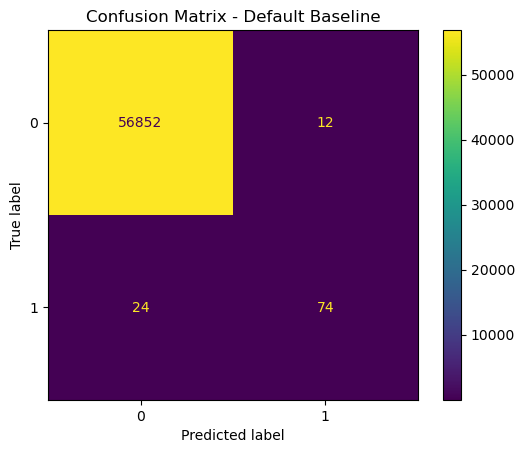

Default Baseline - Precision: 0.86, Recall: 0.76, F1 Score: 0.80


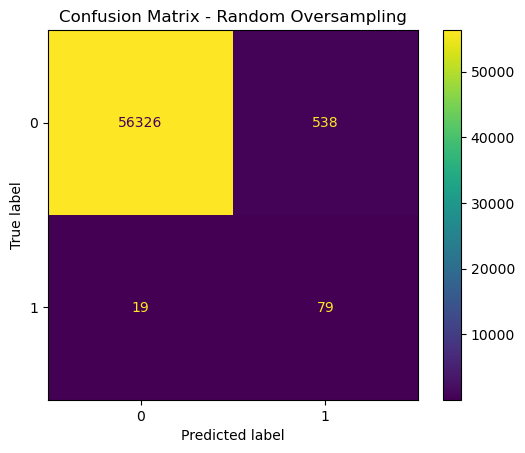

Random Oversampling - Precision: 0.13, Recall: 0.81, F1 Score: 0.22


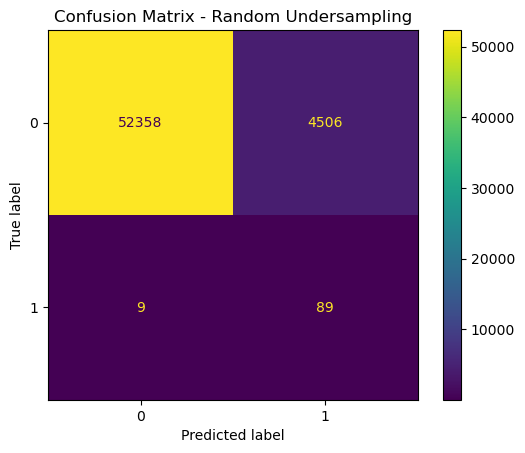

Random Undersampling - Precision: 0.02, Recall: 0.91, F1 Score: 0.04


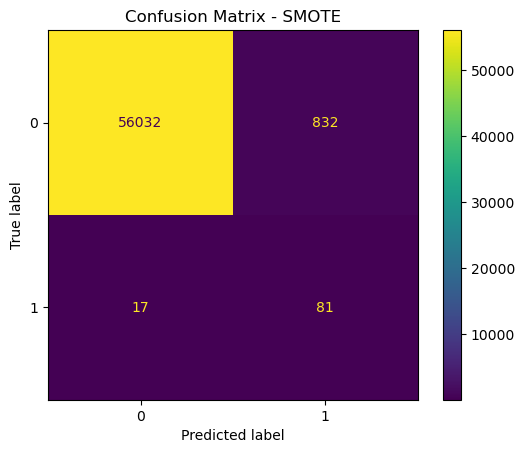

SMOTE - Precision: 0.09, Recall: 0.83, F1 Score: 0.16


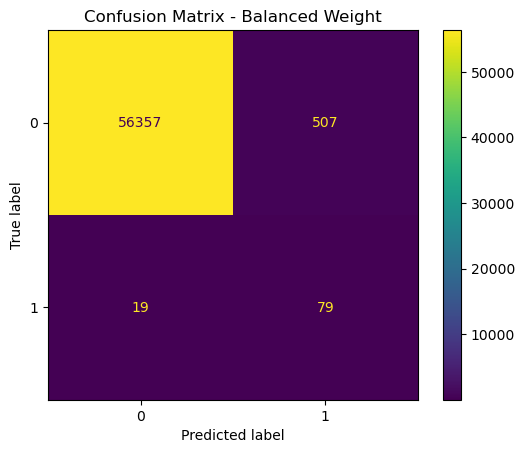

Balanced Weight - Precision: 0.13, Recall: 0.81, F1 Score: 0.23


In [31]:
#Your Code Here
plot_confusion_matrix_and_metrics("Default Baseline", y_test, y_pred_default)
plot_confusion_matrix_and_metrics("Random Oversampling", y_test, y_pred_oversampled)
plot_confusion_matrix_and_metrics("Random Undersampling", y_test, y_pred_undersampled)
plot_confusion_matrix_and_metrics("SMOTE", y_test, y_pred_smote)
plot_confusion_matrix_and_metrics("Balanced Weight", y_test, y_pred_balanced)

For this dataset, Recall is likely the most crucial metric because it ensures that we identify as many actual positives (fraud cases) as possible. Missing a fraud case (a false negative) could have significant consequences. However, prioritizing recall over precision may lead to more false positives, which can be addressed with additional verification steps.

Therefore, in this scenario, it makes sense to prioritize Recall over Precision to minimize the risk of undetected fraud cases.

In [ ]:
#Your Code Here

In [ ]:
#Comment

### **4.3: Model Prediction & Evaluation - ROC Curves**

Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

In [35]:
#Your Code Here
def plot_roc_curves(models, y_test, y_preds_proba):
    plt.figure(figsize=(10, 7))
    
    for model_name, y_pred_proba in models.items():
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

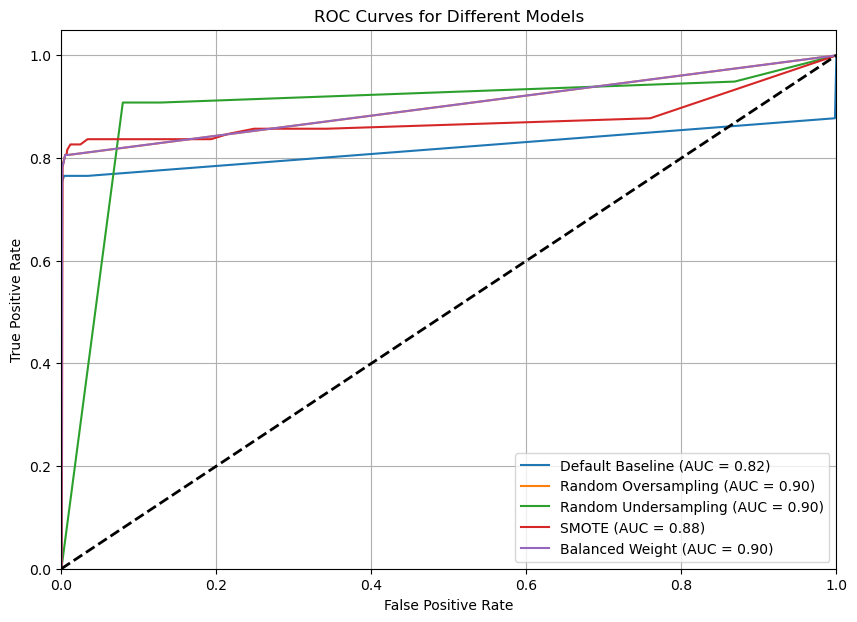

In [36]:
models = {
    "Default Baseline": y_pred_proba_default,
    "Random Oversampling": y_pred_proba_oversampled,
    "Random Undersampling": y_pred_proba_undersampled,
    "SMOTE": y_pred_proba_smote,
    "Balanced Weight": y_pred_proba_balanced
}

plot_roc_curves(models, y_test, models)

The most appropriate technique is the one with the highest AUC on the ROC curve. A higher AUC means the model is better at detecting actual positive cases (like fraud) while keeping false alarms low.

For this dataset, SMOTE or Balanced Weight might work well because they handle class imbalance. If either of these shows a higher AUC, it indicates they learn patterns effectively, making them the better choice.